https://stepik.org/lesson/1370107/step/9

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

np.random.seed(0)

# исходные параметры распределений классов
r1 = -0.2
D1 = 3.0
mean1 = [1, -5]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-1, -2]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 1000
N2 = 1000
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.5, shuffle=True)

clf = svm.SVC(kernel='linear').fit(x_train, y_train)
w = [clf.intercept_[0], *clf.coef_[0]]
M = clf.decision_function(x_test)

FPR = []
TPR = []
for t in np.arange(5.7, -7.8, -0.1):
    predict = np.where(M >= t, 1, -1)
    TP = sum([p == y and p == 1 for p, y in zip(predict, y_test)])
    TN = sum([p == y and p == -1 for p, y in zip(predict, y_test)])
    FP = sum([p != y and p == 1 for p, y in zip(predict, y_test)])
    FN = sum([p != y and p == -1 for p, y in zip(predict, y_test)])
    FPR.append(FP / (FP + TN)) # False Positive Rate
    TPR.append(TP / (TP + FN)) # True Positive Rate

# FPR, TPR

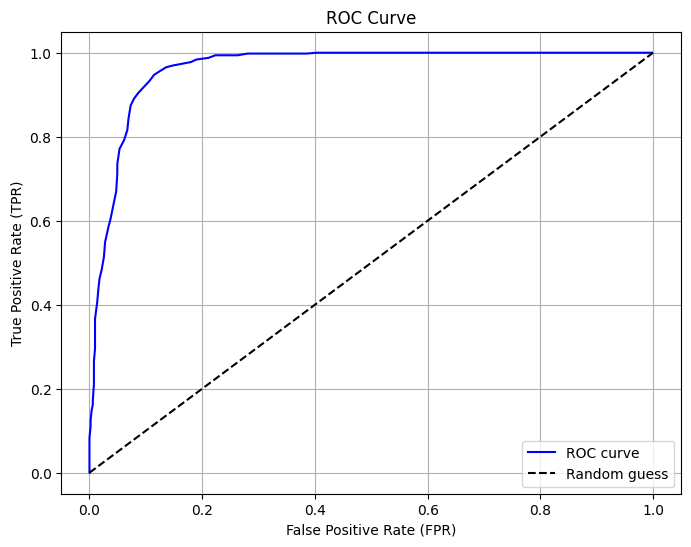

In [ ]:
# Построение ROC-кривой
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, label='ROC curve', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()